# UNIX Commands for Data Science

## Declare Filename

In [1]:
!dir ..\Week2\UNIXDataFiles

 Volume in drive C is OSDisk
 Volume Serial Number is 78F8-20FE

 Directory of C:\Users\NEWNSS\Dropbox\DataScienceMasters\UCSD\PythonForDataScience\Week2\UNIXDataFiles

06/15/2017  12:06 PM    <DIR>          .
06/15/2017  12:06 PM    <DIR>          ..
06/14/2017  02:16 PM             6,148 .DS_Store
06/15/2017  11:23 AM               179 all_fruits.txt
06/14/2017  02:16 PM                64 fruits.txt
06/15/2017  12:06 PM                64 fruits_all_caps.txt
06/15/2017  10:09 AM               419 output.txt
06/14/2017  02:16 PM         5,583,442 shakespeare.txt
06/15/2017  10:02 AM                64 sorted_fruits.txt
06/15/2017  11:35 AM               173 top_shakespeare_words.txt
06/15/2017  12:05 PM                30 top_users.txt
06/15/2017  10:03 AM                49 unique_fruits.txt
              10 File(s)      5,590,632 bytes
               2 Dir(s)  130,772,971,520 bytes free


In [2]:
# store filename in a variable + prefix w/ "r" to store it as a raw string
filename = r"..\Week2\UNIXDataFiles\shakespeare.txt"

# UNIX print of variable contents
!echo $filename

# Python print of variable contents
print(filename)

..\Week2\UNIXDataFiles\shakespeare.txt
..\Week2\UNIXDataFiles\shakespeare.txt


## head and tail commands

In [1]:
#print(!more +5 $filename)

!head -n 5 $filename

'head' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!tail -n 5 $filename

'tail' is not recognized as an internal or external command,
operable program or batch file.


## word count

In [3]:
!wc $filename #returns lines, words, chars and hte f ilename

'wc' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!wc -l $filename #returns just lines

'wc' is not recognized as an internal or external command,
operable program or batch file.


## cat

In [5]:
!cat $filename | wc -l # pipe results of cat command into line count

'cat' is not recognized as an internal or external command,
operable program or batch file.


## grep

In [6]:
!grep -i 'parchment' $filename # search for the word "parchment" + display all lines where it appears at least once

'grep' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
# count how many lines were returned by grep
# use -o to not bring in the full in + just return the word "liberty"

!cat $filename | grep -o 'liberty' | wc -l

'cat' is not recognized as an internal or external command,
operable program or batch file.


## sed (stream editor)

In [8]:
# replace all occurences of 'parchment' w/ 'manuscript'
# s/ = search for
# /g = replace globally

!sed -e 's/parchment/manuscript/g' $filename > temp.txt

# get the lines w/ the replaced word

!grep -i 'manuscript' temp.txt

'sed' is not recognized as an internal or external command,
operable program or batch file.
'grep' is not recognized as an internal or external command,
operable program or batch file.


## sort

In [9]:
# put the lines from above in ASC character order (LTIO - in the character order based on ASCII #'s)

!head -n 3 $filename | sort

'head' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# sort based on 2nd set of words
# words are split into columns, seperated by ' ' (space-seperated)
# so we sort on 2nd col (-k2), and make it case insensitive with '-f'

!head -n 5 $filename | sort -f -t' ' -2

In [ ]:
# get the # of unique lines from sorted output

!sort $filename | uniqu-u | wc -l

# Putting it all together

## Count most frequent words in the text via UNIX

In [10]:
!sed -e 's/ /\'$'\n/g' < $filename | sort | uniq -c | sort -nr | head -15

The system cannot find the file specified.


In [12]:
# write the above results to a file
!sed -e 's/ /\'$'\n/g' < $filename | sort | uniq -c | sort -nr | head -15 > most_frequent_shakespeare_words_python.txt

!cat most_frequent_shakespeare_words_python.txt

The system cannot find the file specified.


## Plot the output file from above

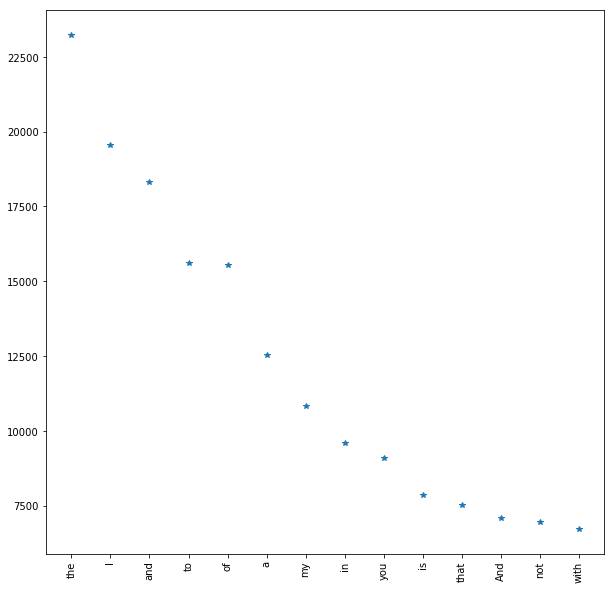

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import csv

# initiate list to hold x + values
xTicks = []
y = []

# open connection in read mode in binary format
with open('most_frequent_shakespeare_words_python.txt','r') as csv_file:
    plots = csv.reader(csv_file, delimiter = ' ')
    for row in plots:
        y.append(int(row[-2]))
        xTicks.append(str(row[-1]))
        
# remove count of spaces (line 1)
y = y[1:]
xTicks = xTicks[1:]

# plot
x = range(len(y))
plt.figure(figsize = (10,10))
plt.xticks(x, xTicks, rotation = 90)
plt.plot(x,y,'*')